In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
tasks = open("Piloto_Eunice/numerico_dificil.json", "r") 

In [92]:
json_tasks = tasks.read()
tasks_data = json.loads(json_tasks)

In [93]:
data = tasks_data.copy()
del data["start_time"]
del data["stop"]
del data["next"]

In [94]:
df = pd.DataFrame(data)

In [95]:
df.head()

,posX,posY,pressure,movementX,movementY,time
0,252.259262,1165.111084,1,0,0,887.2
1,246.814819,1156.944458,1,-6,-9,931.6
2,236.833344,1139.703735,1,-11,-19,941.4
3,215.962952,1091.611084,1,-23,-53,956.4
4,211.425949,1051.685181,1,-5,-44,973.3


In [96]:
def cut_time(i):
    if i.left <0:
        return 0 
    return i.left
    
def complete_position(L):
    new_L = []
    for i in range(0,len(L)):
        j = i
        while(L[j]==0): 
            j=j-1        
        new_L.append(L[j])
    return new_L 

def calc_mov(L):
    new_L = [0]
    for i in range(1,len(L)):
        new_L.append(L[i]-L[i-1])
    return new_L 
    

In [97]:
x = df.copy()
x["time_label"] = pd.cut(x.time, range(0,1000*120+1, 30),include_lowest=True).apply(cut_time)
x = x[["posX","posY","time_label","pressure"]].groupby("time_label", as_index=False).mean()
x["posX2"] = complete_position(x.posX)
x["posY2"] = complete_position(x.posY)

x["movX"] = calc_mov(x.posX2)
x["movY"] = calc_mov(x.posY2)
x["distance"] = x.apply(lambda r: ((r.movX)**2 + (r.movY)**2)**(1/2), axis=1)
x["speed"] = x["distance"]/30

In [98]:
x.speed.fillna(0).mean()

1.8044687271941329

x: 0.9217042557089462

In [1]:
x.speed.fillna(0).mean()

NameError: name 'x' is not defined

In [ ]:
x = df.copy()
x["time_label"] = pd.cut(x.time, range(0,1000*120+1, 30),include_lowest=True).apply(cut_time)
x = x[["posX","posY","time_label","pressure"]].groupby("time_label", as_index=False).mean()
x["posX2"] = complete_position(x.posX)
x["posY2"] = complete_position(x.posY)

x["movX"] = calc_mov(x.posX2)
x["movY"] = calc_mov(x.posY2)
x["distance"] = x.apply(lambda r: ((r.movX)**2 + (r.movY)**2)**(1/2), axis=1)
x["speed"] = x["distance"]/30

In [53]:
pd.cut(df.time, range(0,1000*120+1, 30),include_lowest=True).apply(cut_time)

0         1500.0
1         1590.0
2         1590.0
3         1620.0
4         1650.0
5         1650.0
6         1680.0
7         1680.0
8         1710.0
9         1710.0
10        1740.0
11        1740.0
12        1770.0
13        1800.0
14        1800.0
15        1830.0
16        1830.0
17        1860.0
18        1860.0
19        1890.0
20        1920.0
21        1920.0
22        1950.0
23        1950.0
24        1980.0
25        1980.0
26        2010.0
27        2010.0
28        2040.0
29        2040.0
          ...   
4631    118920.0
4632    118950.0
4633    118980.0
4634    119040.0
4635    119070.0
4636    119100.0
4637    119130.0
4638    119160.0
4639    119190.0
4640    119220.0
4641    119250.0
4642    119280.0
4643    119340.0
4644    119370.0
4645    119400.0
4646    119430.0
4647    119460.0
4648    119490.0
4649    119520.0
4650    119550.0
4651    119610.0
4652    119670.0
4653    119700.0
4654    119760.0
4655    119820.0
4656    119850.0
4657    119880.0
4658    119910

Graficamos todos los puntos obtenidos en una prueba para verificar que se logran captar las figuras que realiza el usuario sobre la pizarra.

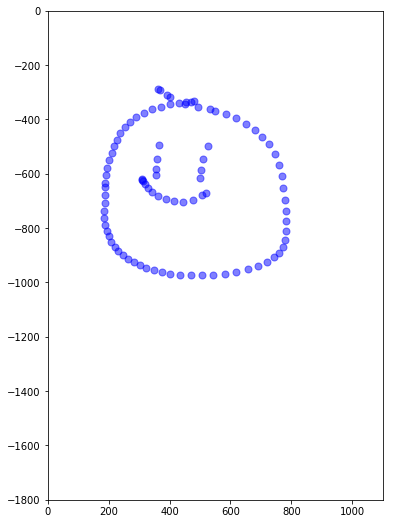

In [36]:
plt.figure(figsize=(6,9))

for i in range(len(df.posX )):
    posX = df.loc[i,"posX"]
    posY = df.loc[i,"posY"]*-1
    
    plt.plot(posX, posY, "o", c="b", markersize=7, alpha=0.5)
plt.xlim([0,1100])
plt.ylim([-1800,0])
plt.savefig("movimiento_recuperado.jpg")

In [ ]:
tasks_Df = pd.DataFrame(tasks_data)

In [25]:
tasks_Df

,respuesta,dificultad
0,3373,Easy
1,5952,Easy
2,6977,Easy
3,12304,Easy
4,13696,Easy
5,15243,Easy
6,16714,Easy
7,17911,Easy
8,19039,Easy
9,20055,Easy
